<a href="https://colab.research.google.com/github/Binu-Getachew/ML-Projects/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**library**

You'll need essential libraries for data handling, analysis, and modeling.

pandas: For data manipulation and analysis (e.g., loading the dataset into a DataFrame).

numpy: For numerical operations, especially array handling.

matplotlib and seaborn: For data visualization and exploration.

sklearn (Scikit-learn): The primary library for machine learning models, data splitting, and evaluation.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


***Load the Data***

Load the Iris dataset. In many educational environments, this dataset is pre-packaged within the sklearn library, or you can load it from a CSV file.

Examine the data's structure (e.g., the first few rows, column names, data types, and the overall shape).

The pandas` .head()` method is usually the easiest and most readable way to preview your data!

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
print("First 5 rows of our data")
print(data.data[:5])
print('\n')
print("column names, data types, and the overall shape")
print(df)
print('\n')
print('Head method')
print(df.head())


First 5 rows of our data
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


column names, data types, and the overall shape
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4         

**Exploratory Data Analysis (EDA)**

This phase is about understanding the data's characteristics, identifying relationships, and checking for quality issues.

***Descriptive Statistics:*** Check the mean, standard deviation, min/max values for each feature (sepal length, sepal width, petal length, petal width).

***Missing Values:*** Verify that there are no missing or null values (the Iris dataset is clean, but this step is crucial for real-world data).

***Feature Distribution:***

***Plot histograms or box plots*** for each numerical feature to see how the values are distributed.

***Visualize*** the relationship between features using scatter plots or a Pair Plot (plotting every feature against every other feature, colored by the species). This helps identify if a linear separation is possible.

***Target Variable Distribution:*** Check the count of each species (Setosa, Versicolor, Virginica) to ensure the dataset is balanced.

Option 1: Using describe() for more statistics

In [3]:
print('Descriptive Statistics Using describe() for more statistics:')
print('\n')
print(df.describe())


Descriptive Statistics Using describe() for more statistics:


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


Option 2: Using numpy

In [4]:
means = np.mean(data.data, axis=0)
print(means)

# With feature names
print('Mean of each:')
for name, mean_val in zip(data.feature_names, means):
    print(f"{name}: {mean_val}")

print('\nStandard deviation of each:')
std = np.std(data.data, axis=0)
print(std)

# With feature names
print('Standard deviation of each:')
for name, standard_deviation in zip(data.feature_names, std):
    print(f"{name}: {standard_deviation}")



[5.84333333 3.05733333 3.758      1.19933333]
Mean of each:
sepal length (cm): 5.843333333333335
sepal width (cm): 3.057333333333334
petal length (cm): 3.7580000000000027
petal width (cm): 1.199333333333334

Standard deviation of each:
[0.82530129 0.43441097 1.75940407 0.75969263]
Standard deviation of each:
sepal length (cm): 0.8253012917851409
sepal width (cm): 0.43441096773549437
petal length (cm): 1.7594040657753032
petal width (cm): 0.7596926279021594


**Missing Values:** Verify that there are no missing or null values (the Iris dataset is clean, but this step is crucial for real-world data).

In [5]:
print(df.isnull().sum())
print(df.isna().sum()) #same as isnull().sum

print('\nTotal missing:', df.isnull().sum().sum()) #Total missing values
print('\nAny missing values:',df.isnull().any().any()) #boolean
print('NaN values:',np.isnan(data.data).sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Total missing: 0

Any missing values: False
NaN values: 0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Feature Distribution:**

Plot histograms or box plots for each numerical feature to see how the values are distributed.

Visualize the relationship between features using scatter plots or a Pair Plot (plotting every feature against every other feature, colored by the species). This helps identify if a linear separation is possible.

Option 1: Histogram for all features

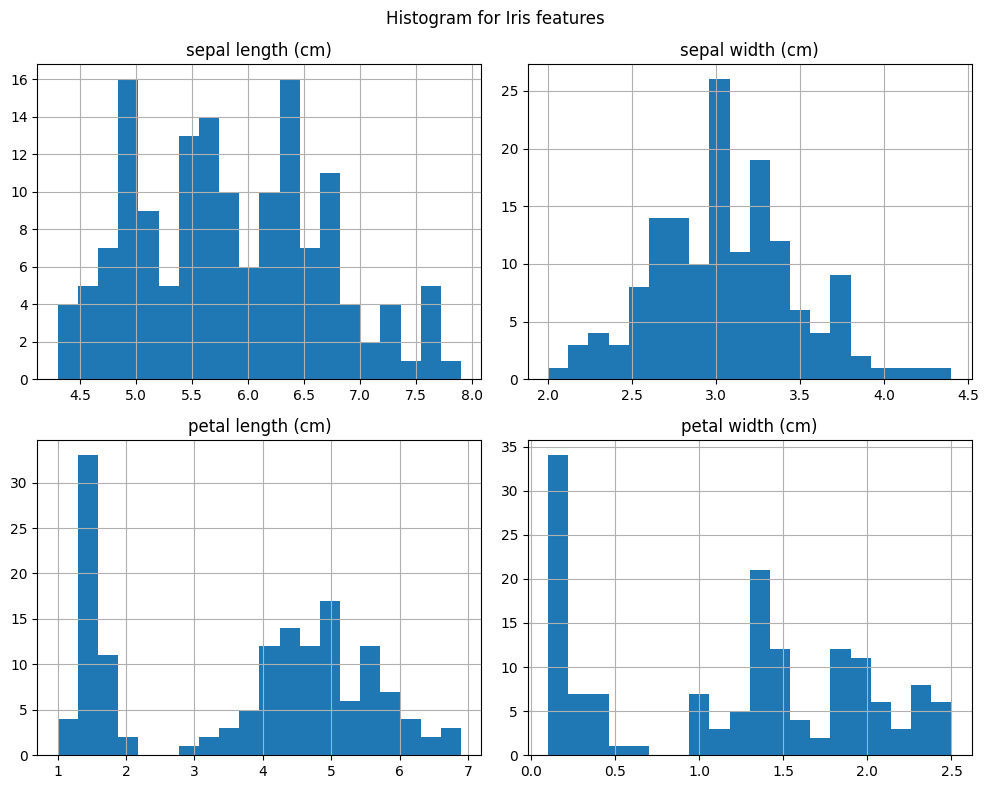

In [7]:
df.hist(figsize=(10,8),bins=20)
plt.suptitle("Histogram for Iris features")
plt.tight_layout()
plt.show()

Option 2: Box plots for all features

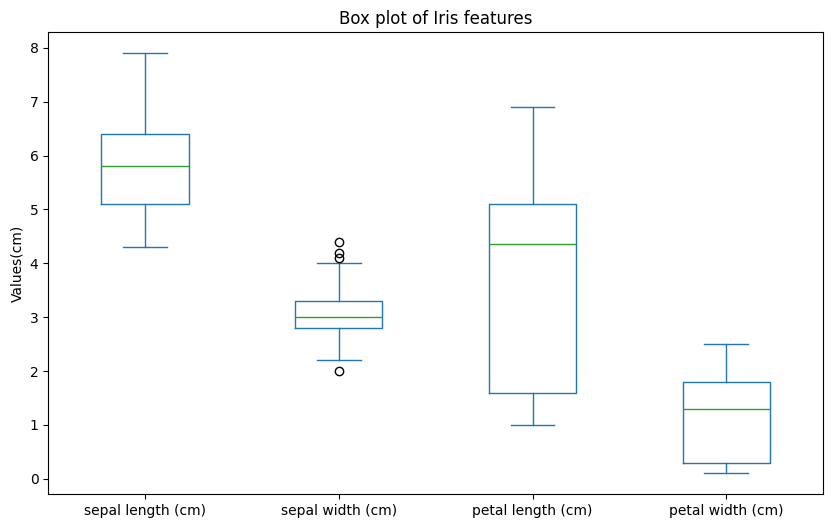

In [8]:
df.plot(kind='box',figsize=(10,6))
plt.title('Box plot of Iris features')
plt.ylabel('Values(cm)')
plt.show()

Option 3: Individual plots with more control

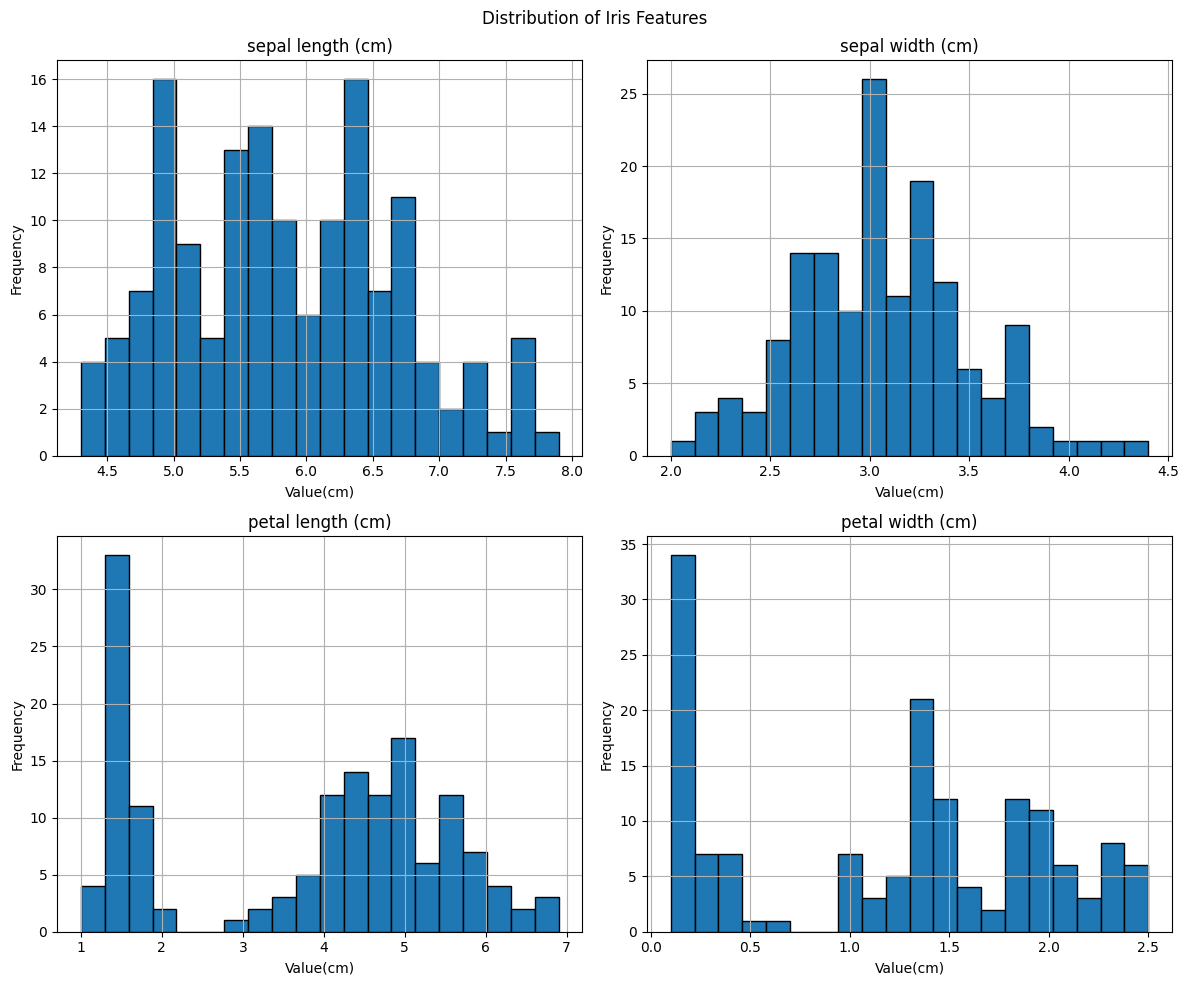

In [9]:
fig, axes=plt.subplots(2,2,figsize=(12,10))
fig.suptitle('Distribution of Iris Features')


for i,col in enumerate(df.columns):
  ax=axes[i//2, i%2]
  df[col].hist(bins=20, ax=ax, edgecolor='black')
  ax.set_title(col)
  ax.set_xlabel('Value(cm)')
  ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Option 4: Using Seaborn (Prettier Visualization)

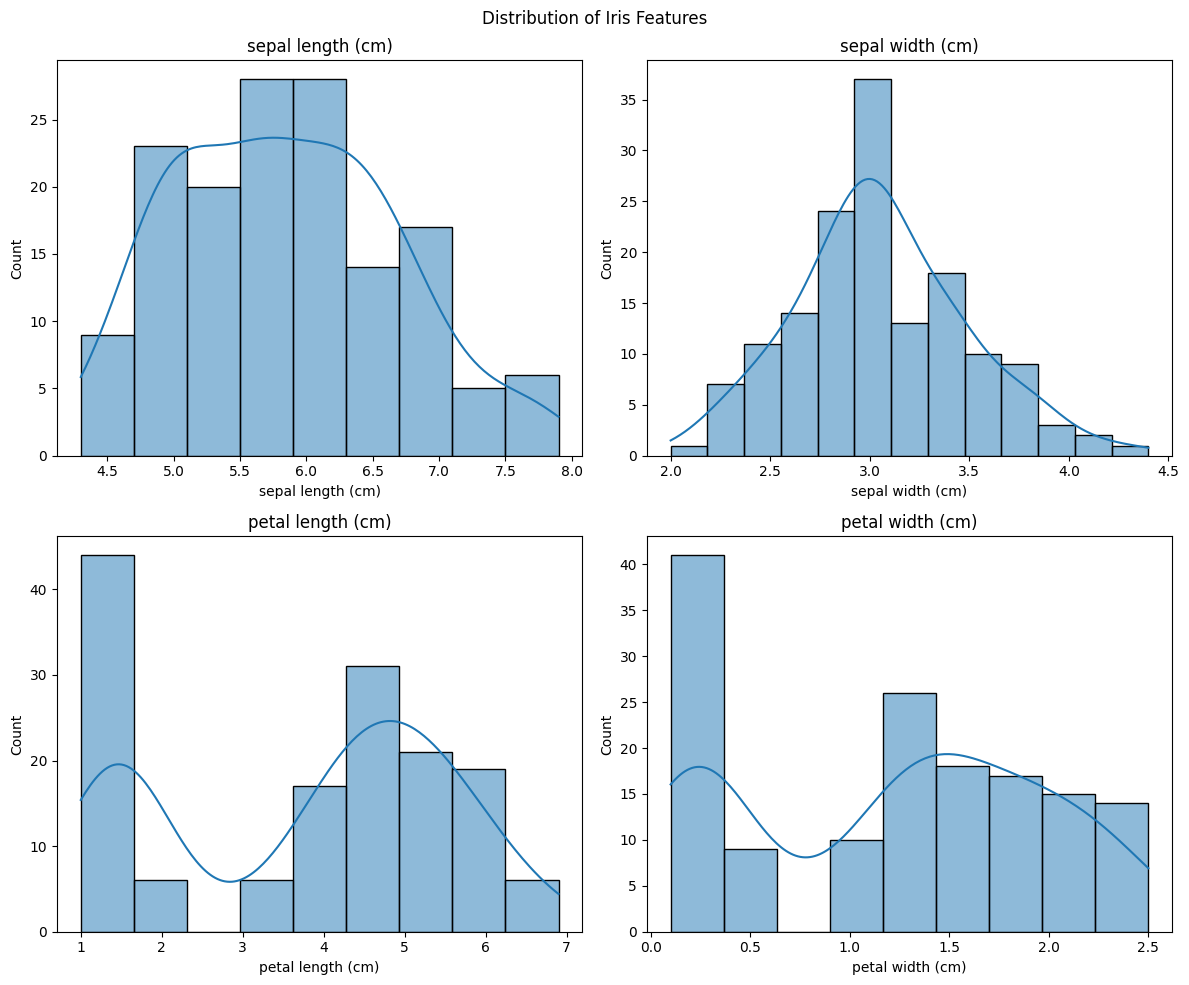

In [10]:
fig, axes=plt.subplots(2,2,figsize=(12,10))
fig.suptitle('Distribution of Iris Features')


for i,col in enumerate(df.columns):
  ax=axes[i//2, i%2]
  sns.histplot(df[col], kde=True, ax=ax)
  ax.set_title(col)
plt.tight_layout()
plt.show()

**Target Variable Distribution:**

Check the count of each species (Setosa, Versicolor, Virginica) to ensure the dataset is balanced.

In [13]:
df['species']=pd.Categorical.from_codes(data.target, data.target_names)
print(df['species'].value_counts().sort_index())

#print(df.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


**Data Preprocessing**

For the Iris dataset, this step is often minimal because the features are already numerical and scaled similarly, and there are no missing values.

Feature (X) and Target (y) Separation: Split the data into features (the four measurements) and the target variable (the flower species).

In [16]:
df['species']=data.target

x=df.iloc[:,:-1]
y=df.iloc[:,-1]

print(f'X shape: {x.shape}')
print(f'Y shape: {y.shape}')
print(f'\nfeature names: {data.feature_names}')
print(f'Target names: {data.target_names}')

X shape: (150, 4)
Y shape: (150,)

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [24]:
print(df.iloc[1,1])
print(df.loc[1,'sepal length (cm)'])

3.0
4.9


**Feature Scaling/Normalization:**

While often optional for simple distance-based algorithms like KNN, for algorithms that rely on feature magnitudes (like SVM with an RBF kernel), it might be a good practice to scale the data (e.g., using `StandardScaler` or `MinMaxScaler`).

In [33]:
minmax_scaler=MinMaxScaler()
x_scaled=minmax_scaler.fit_transform(df)
#print(x_scaled)

standard_scaler=StandardScaler()
x_sscaled=standard_scaler.fit_transform(df)
#print('X scaled', x_sscaled)


print("Minmax Scaling results:")
print(x_scaled[:5])  # Show first 5 rows

print("Standard Scaling results:")
print(x_sscaled[:5])  # Show first 5 rows

Minmax Scaling results:
[[0.22222222 0.625      0.06779661 0.04166667 0.        ]
 [0.16666667 0.41666667 0.06779661 0.04166667 0.        ]
 [0.11111111 0.5        0.05084746 0.04166667 0.        ]
 [0.08333333 0.45833333 0.08474576 0.04166667 0.        ]
 [0.19444444 0.66666667 0.06779661 0.04166667 0.        ]]
Standard Scaling results:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443  -1.22474487]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443  -1.22474487]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443  -1.22474487]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443  -1.22474487]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443  -1.22474487]]


Split Data into Training and Testing Sets

This is a critical step to ensure your model generalizes well to new, unseen data.

Use `sklearn.model_selection.train_test_split` to divide your dataset into two subsets:

Training Set (e.g., 70-80% of the data): Used to train the model.

Testing Set (e.g., 20-30% of the data): Used to evaluate the model's performance.

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Choose and Train a Model

Select a classification algorithm and train it on the training data. For this project, a great start is K-Nearest Neighbors (KNN).

Instantiate the Model:

Create an instance of the chosen classifier (e.g., `KNeighborsClassifier`).

Train the Model: Fit the model to your training data (`X_train, y_train`).

In [45]:
knn=KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    metric='minkowski'
)

knn.fit(x_train,y_train)

print("\nModel trained successfully!")



Model trained successfully!


Evaluate the Model

Assess how well your trained model performs on data it has never seen before (the test set).

Make Predictions:
Use the trained model to predict the species for the testing features (`X_test`).

Calculate Accuracy:
Compare the model's predictions with the actual species in the test set (`y_test`).

Generate a Confusion Matrix:

This table summarizes the number of correct and incorrect predictions for each species, giving a detailed view of where the model makes mistakes.

Print a Classification Report:

This provides common metrics like Precision, Recall, and F1-Score for each class, offering a comprehensive performance assessment.

In [48]:
#Basic operation
y_pred=knn.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 1.0000
Accuracy: 100.00%


In [51]:
y_pred=knn.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [52]:
print("Classification Report:")
print(classification_report(y_test,y_pred,target_names=data.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [57]:
print("Sample Predictions:")
print("Actual      |  predicted    |  Species")
print("-" * 40)
for i in range(10):
  actual_names=data.target_names[y_test.iloc[i]]
  predicted_names=data.target_names[y_pred[i]]
  if y_test.iloc[i]==y_pred[i]:
    match='✓'
  else:
    match='x'

  print(f'{actual_names:10}  |   {predicted_names:10}  |  {match}')

Sample Predictions:
Actual      |  predicted    |  Species
----------------------------------------
versicolor  |   versicolor  |  ✓
setosa      |   setosa      |  ✓
virginica   |   virginica   |  ✓
versicolor  |   versicolor  |  ✓
versicolor  |   versicolor  |  ✓
setosa      |   setosa      |  ✓
versicolor  |   versicolor  |  ✓
virginica   |   virginica   |  ✓
versicolor  |   versicolor  |  ✓
versicolor  |   versicolor  |  ✓


Visualize Confusion Matrix:

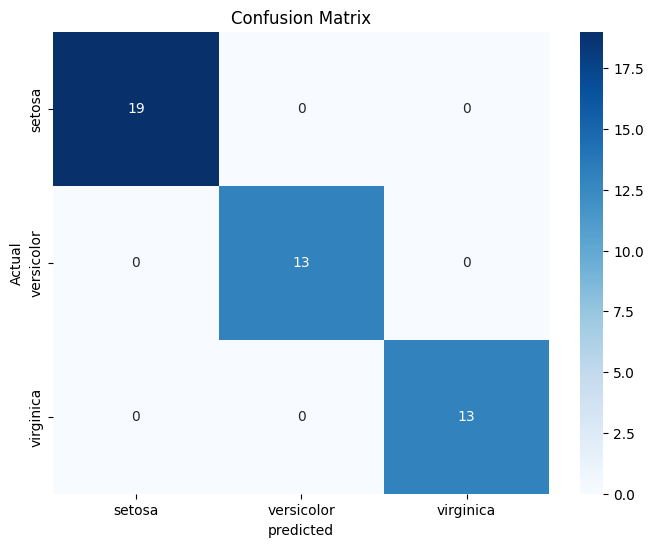

In [58]:
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('predicted')
plt.show()

Different k-values

In [63]:
print('Testing different k values')
print('-'*35)

for k in range(1,11):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  accuracy=knn.score(x_test, y_test)
  print(f'k={k:2d}  |  Accuracy: {accuracy*100: .2f}%')

Testing different k values
-----------------------------------
k= 1  |  Accuracy:  100.00%
k= 2  |  Accuracy:  100.00%
k= 3  |  Accuracy:  100.00%
k= 4  |  Accuracy:  100.00%
k= 5  |  Accuracy:  100.00%
k= 6  |  Accuracy:  100.00%
k= 7  |  Accuracy:  100.00%
k= 8  |  Accuracy:  100.00%
k= 9  |  Accuracy:  100.00%
k=10  |  Accuracy:  100.00%


Plot Accuracy Vs K

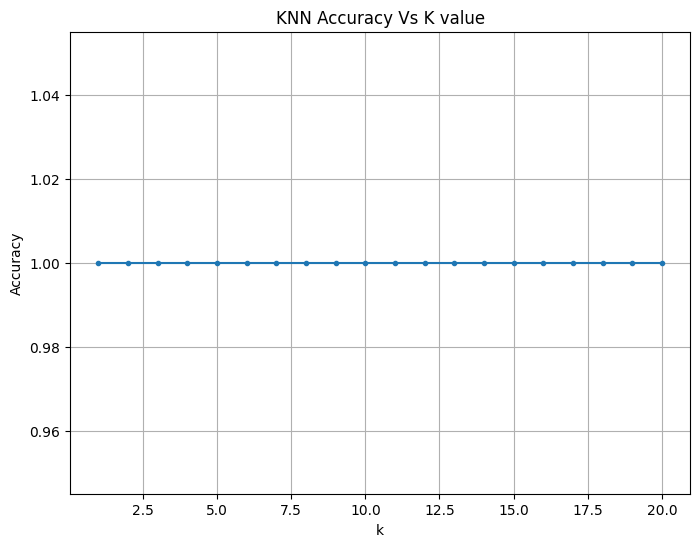

Best k: 1 with accuracy: 100.00%


In [78]:
accuracies=[]
k_values=range(1,21)

for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  accuracies.append(knn.score(x_test, y_test))

plt.figure(figsize=(8,6))
plt.plot(k_values, accuracies, marker='.')

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Vs K value')
plt.grid(True)
plt.show()

best_k=k_values[accuracies.index(max(accuracies))]
print(f'Best k: {best_k} with accuracy: {max(accuracies)*100:.2f}%')

 Hyperparameter Tuning

 For models like KNN, the parameter $K$ (the number of neighbors) is a hyperparameter. Try training and evaluating the model with different values of $K$ (e.g., 1, 3, 5, 7) to find the one that yields the best performance on the test set.

In [82]:
k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"k={k:2d} | Mean CV Score: {scores.mean():.4f} | Std: {scores.std():.4f}")

best_k = k_values[np.argmax(cv_scores)]
print(f"\nBest k: {best_k} with CV score: {max(cv_scores):.4f}")

k= 1 | Mean CV Score: 0.9524 | Std: 0.0301
k= 2 | Mean CV Score: 0.9333 | Std: 0.0381
k= 3 | Mean CV Score: 0.9333 | Std: 0.0381
k= 4 | Mean CV Score: 0.9333 | Std: 0.0381
k= 5 | Mean CV Score: 0.9429 | Std: 0.0356
k= 6 | Mean CV Score: 0.9429 | Std: 0.0356
k= 7 | Mean CV Score: 0.9524 | Std: 0.0301
k= 8 | Mean CV Score: 0.9524 | Std: 0.0301
k= 9 | Mean CV Score: 0.9429 | Std: 0.0356
k=10 | Mean CV Score: 0.9333 | Std: 0.0381
k=11 | Mean CV Score: 0.9333 | Std: 0.0571
k=12 | Mean CV Score: 0.9333 | Std: 0.0381
k=13 | Mean CV Score: 0.9429 | Std: 0.0356
k=14 | Mean CV Score: 0.9524 | Std: 0.0301
k=15 | Mean CV Score: 0.9333 | Std: 0.0571
k=16 | Mean CV Score: 0.9429 | Std: 0.0356
k=17 | Mean CV Score: 0.9333 | Std: 0.0571
k=18 | Mean CV Score: 0.9143 | Std: 0.0762
k=19 | Mean CV Score: 0.9429 | Std: 0.0467
k=20 | Mean CV Score: 0.9238 | Std: 0.0486
k=21 | Mean CV Score: 0.9238 | Std: 0.0486
k=22 | Mean CV Score: 0.9238 | Std: 0.0486
k=23 | Mean CV Score: 0.9238 | Std: 0.0486
k=24 | Mean